# U2L4: 2,3&4



## L4.2 >> DRILL: Prepare the Data (from Multivariable regression)



[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

## L4.3 >> DRILL: fixing assumptions (from Explanatory power: assumptions of linear regression)

## L4.4 >> Challenge: make your own regression model
Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [803]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [804]:
link = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

indices_to_skip = np.array([0,1,2,353,354,355])

df = pd.read_csv(link,skiprows=indices_to_skip , header=1)

df.tail()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,"10,685",3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,"5,931",2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,"199,134","1,036",6,nan,25,390,615,"2,368",470,"1,662",236,10.000
347,Yorktown Town,"36,643",15,0,nan,0,2,13,334,45,287,2,nan


In [616]:
df.shape

(348, 13)

In [617]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [357]:
# Not working:
new_cols = ['Murder','Rubberry']
def insert_cols(df):
    for i in range(len(new_cols)):
        #df[new_cols[i]]==np.nan
        return new_cols[i]
    
insert_cols(df)

'Murder'

### Replace ',' before converting to numeric:

In [805]:
cols = df.columns.drop(['City','Murder and\nnonnegligent\nmanslaughter','Rape\n(revised\ndefinition)1','Arson3'])

# Replace ',' before converting to numeric:
df[cols]=df[cols].replace(',*','',regex=True)

# Convert to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

### Create the 3 columns Murder, Robbery and Population:

In [806]:


# df['Murder'] = np.nan
df.loc[df['Murder and\nnonnegligent\nmanslaughter']>0,'Murder']=1
df.loc[df['Murder and\nnonnegligent\nmanslaughter']==0,'Murder']=0

df.loc[df['Robbery'].astype(int)>0,'Robbery_']=1
df.loc[df['Robbery'].astype(int)==0,'Robbery_']=0


In [807]:
print(df.Murder.value_counts())
print(df.Robbery_.value_counts())

0.000    299
1.000     49
Name: Murder, dtype: int64
1.000    209
0.000    139
Name: Robbery_, dtype: int64


In [398]:
#df.sort_values('Robbery', ascending=False).head(10)

In [808]:
# This will not return error b/c it is numeric now:
df['population_squared'] = df['Population']**2 

In [809]:
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
Murder                                    float64
Robbery_                                  float64
population_squared                          int64
dtype: object

In [623]:
# Which are the numeric values from columns:
a = pd.to_numeric(df['Population'], errors='coerce')#.isnull()
#type(a)
#a.dropna()
a.sort_values( ascending=True).head(10)

118    526
319    615
136    656
12     658
44     762
344    829
287    872
266    977
48     980
260    997
Name: Population, dtype: int64

-------------
$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [810]:
# Create a new df to hold only these variable:

prop_crime = df[['Property\ncrime','Population','population_squared','Murder','Robbery_']]
prop_crime.head()

,Property crime,Population,population_squared,Murder,Robbery_
0,12,1861,3463321,0.000,0.000
1,24,2577,6640929,0.000,0.000
2,16,2846,8099716,0.000,0.000
3,4090,97956,9595377936,1.000,1.000
4,223,6388,40806544,0.000,1.000


In [811]:
prop_crime.describe()

,Property crime,Population,population_squared,Murder,Robbery_
count,348.000,348.000,348.000,348.000,348.000
mean,792.606,40037.632,203554650960.236,0.141,0.601
std,7659.725,450037.368,3778875542708.130,0.348,0.490
min,0.000,526.000,276676.000,0.000,0.000
25%,40.500,3003.000,9018117.000,0.000,0.000
50%,112.500,7233.500,52325684.500,0.000,1.000
75%,341.000,18427.500,339753567.000,0.000,1.000
max,141971.000,8396126.000,70494931807876.000,1.000,1.000


### There is a a huge OUTLIER !!!
We need feature transformation: drop outliers, apply log, cube etc

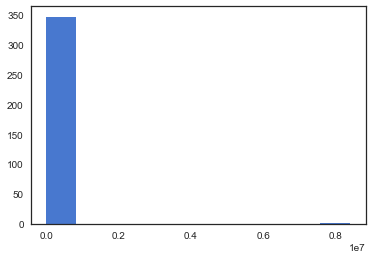

In [812]:
plt.hist(prop_crime['Population'],bins=10)
plt.show()

In [813]:
# Who are the biggest towns ?
prop_crime.sort_values('Population', ascending=False).head()

,Property crime,Population,population_squared,Murder,Robbery_
216,141971,8396126,70494931807876,1.000,1.000
35,12491,258789,66971746521,1.000,1.000
272,10051,210562,44336355844,1.000,1.000
346,2368,199134,39654349956,1.000,1.000
310,6473,143834,20688219556,1.000,1.000


### Drop values in "Population" that are outliers (more than 3 stdev from the mean):

In [814]:
q = prop_crime["population_squared"].quantile(0.99)
prop_crime=prop_crime[prop_crime["population_squared"] < q].sort_values('population_squared', ascending=False)

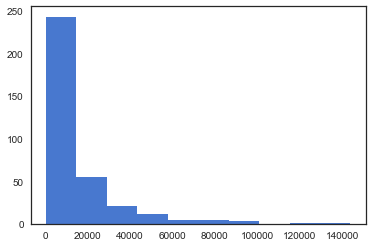

In [815]:
plt.hist(prop_crime['Population'])
plt.show()

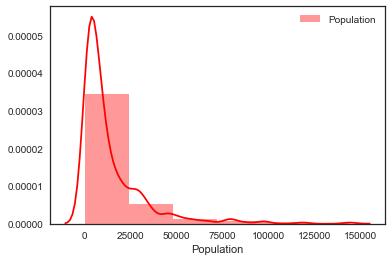

In [816]:
import seaborn as sns

sns.distplot( prop_crime["Population"] , color="red", label="Population",bins=6)
plt.legend()
plt.show()

###  a continuous and a categorical pair:
* boxplot

### Plot the 3 numerical features with boxplots for each 'Murder' situation.

In [817]:
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.

df_murder_cols = prop_crime.columns.drop(['Robbery_'])
df_murder = prop_crime[df_murder_cols]
#df_murder.head(50)

In [818]:
df_murder = pd.melt(df_murder, id_vars=['Murder'])
#df_murder
#df_murder.variable.value_counts()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


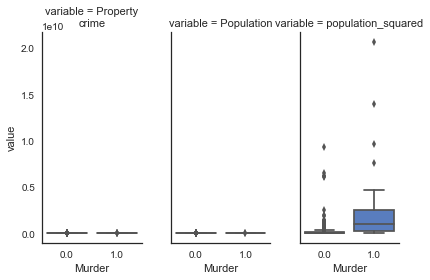

In [819]:
g = sns.FacetGrid(df_murder, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Murder", "value")
plt.show()

* Because the three columns haven't been normalized, this plot is not yet relevant.

We'll do this step soon.

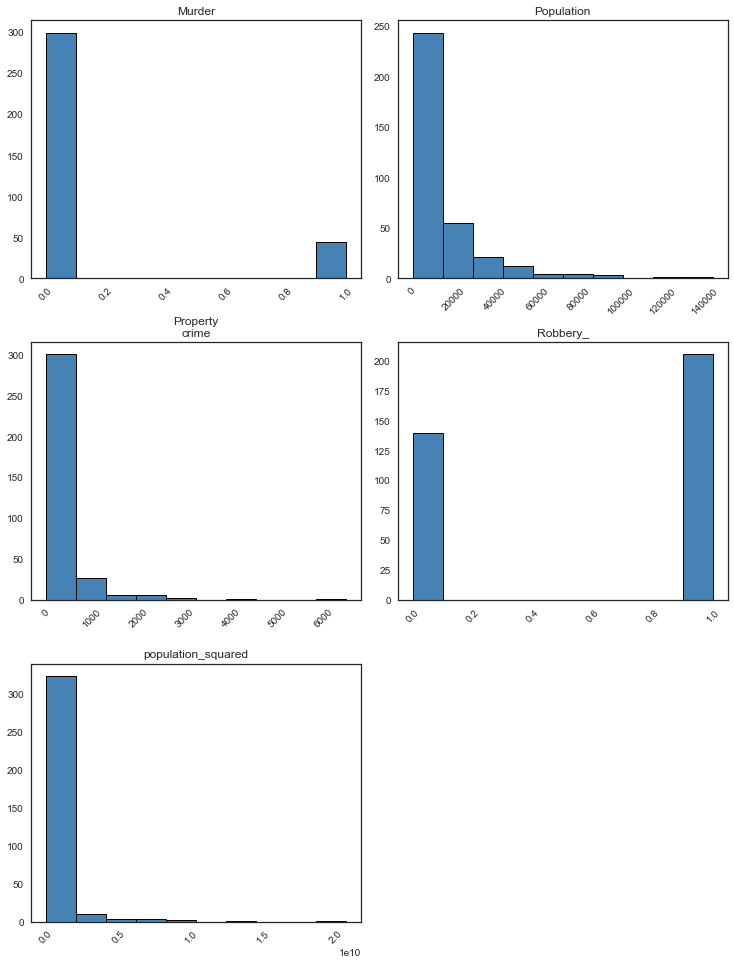

In [820]:
# Plot histograms to see what kind of distribution there is in each column:

fig = prop_crime.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(7,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

* For numerical columns: they are skewed to the right.

Categorigal columns don't have any interpretation.

### Create the default pairplot for numerical columns to better see how data is groupping:

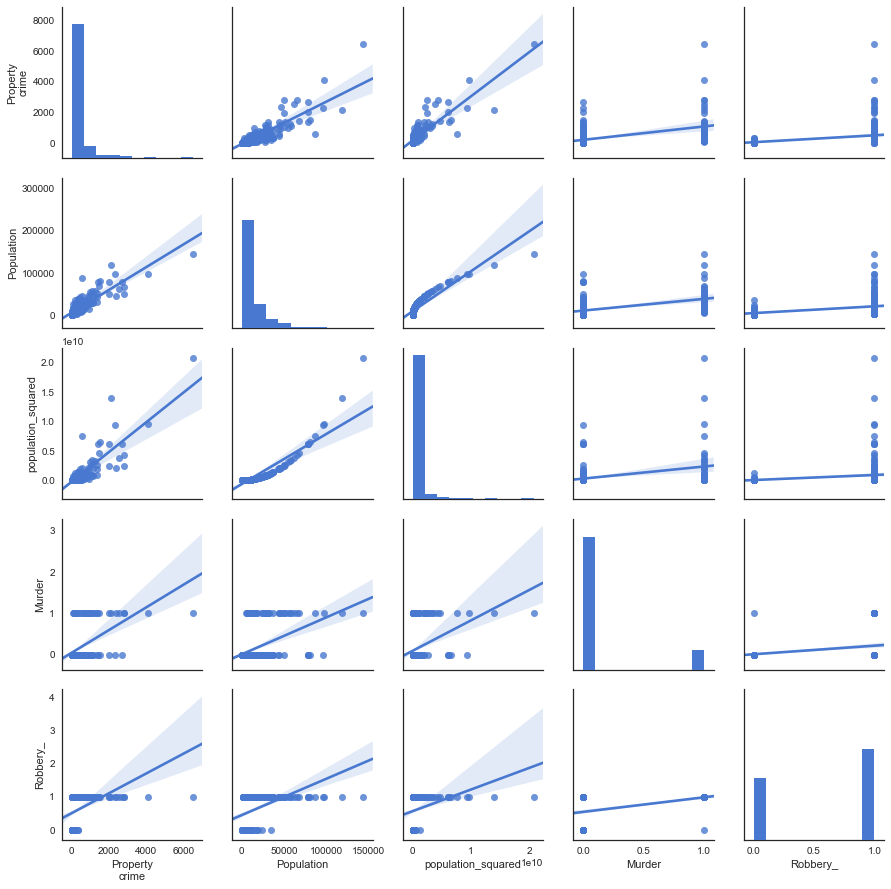

In [821]:
g=sns.pairplot(prop_crime.fillna(0) , diag_kind='hist' , kind='reg' )
plt.show()

### The histograms show no normal distribution. We should apply <u>feature transformations</u> on both numerical and categorical columns!

* The two categorical columns, Robbery and Murder, can be transformed into numeric representations with `getdummies`

In [822]:
# Making dummies.
# Also creating a data frame to hold our features.
features1 = pd.get_dummies(prop_crime['Murder'])
features1.columns=['Murder_False','Murder_True']

features2 = pd.get_dummies(prop_crime['Robbery_'])
features2.columns=['Robbery_False','Robbery_True']
features = pd.concat((features1 , features2),axis=1)
features.head()

,Murder_False,Murder_True,Robbery_False,Robbery_True
310,0,1,0,1
7,0,1,0,1
3,0,1,0,1
126,1,0,0,1
267,0,1,0,1


In [823]:
prop_crime2 =  pd.concat((prop_crime , features),axis=1)
prop_crime2 = prop_crime2.drop(['Murder','Robbery_'],1)

### Logarithm: 
Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to <b><u>zero</u></b> or negative values as well.

### From the three numerical columns, only 'Property crime' could have zero values, b/c the population can't be zero!

In [824]:

print(prop_crime2[prop_crime2['Property\ncrime']<=0])


     Property\ncrime  Population  population_squared  Murder_False  \
186                0        1688             2849344             1   
208                0        1622             2630884             1   
295                0        1437             2064969             1   
256                0        1274             1623076             1   
287                0         872              760384             1   
319                0         615              378225             1   

     Murder_True  Robbery_False  Robbery_True  
186            0              1             0  
208            0              1             0  
295            0              1             0  
256            0              1             0  
287            0              1             0  
319            0              1             0  


### >> we can drop these ZERO lines b/c population is very small and probably won't influence the analysis too much!

In [825]:
prop_crime2.is_copy = False # to deal with 'SettingWithCopyWarning'.
prop_crime2.drop(prop_crime2[prop_crime2['Property\ncrime']<=0].index , inplace=True)

In [826]:
prop_crime_log = prop_crime2[['Property\ncrime','Population','population_squared']].apply(np.log)
prop_crime_log.head(5)

,Property crime,Population,population_squared
310,8.775,11.876,23.753
7,7.658,11.681,23.362
3,8.316,11.492,22.985
126,7.742,11.479,22.958
267,6.340,11.376,22.752


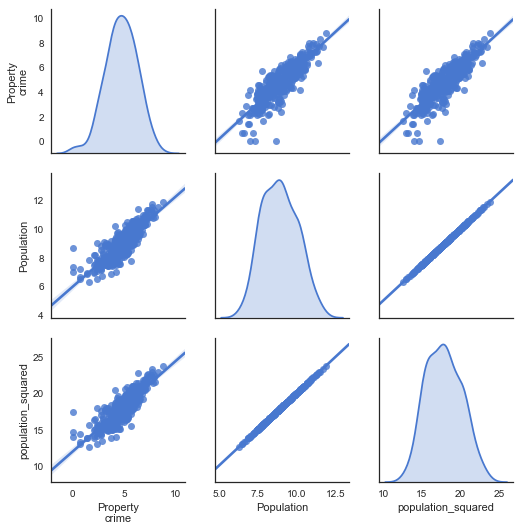

In [827]:
g=sns.pairplot(prop_crime_log, diag_kind='kde' , kind='reg'
               #, plot_kws=dict(edgecolor="k", linewidth=0.5)
               , diag_kws=dict(shade=True)
              )
plt.show()

### Now the histograms look more <u>normal</u> and the scatter plots are more linearly oriented!

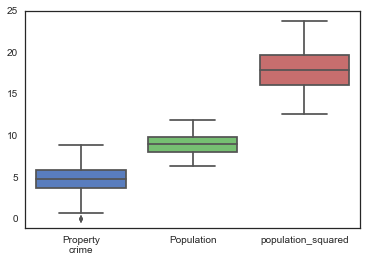

In [828]:
sns.boxplot( data = prop_crime_log )
plt.show()

###  StandardScaler or MinMaxScaler.

Also these scalers are good for normal data.

When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation <u>does not change the shape</u> of the variable distribution

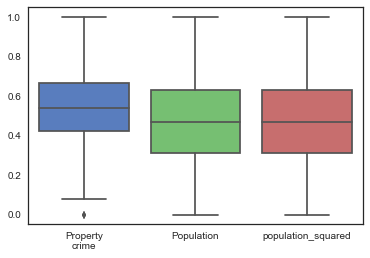

In [829]:
import pandas as pd
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,quantile_transform
scaler = MinMaxScaler()

b_fit_scaled = scaler.fit_transform(prop_crime_log)

index = ['Row'+str(i) for i in range(1, len(b_fit_scaled)+1)]
df_fit_scaled = pd.DataFrame(b_fit_scaled, index=prop_crime_log.index , columns = prop_crime_log.columns )

sns.boxplot( data = df_fit_scaled )
plt.show()


### Already have dropped values in "Population" that are outliers (more than 3 stdev from the mean)


### Create a correlation matrix between continuous variables:

                    Property\ncrime  Population  population_squared  \
Property\ncrime               1.000       0.863               0.856   
Population                    0.863       1.000               0.899   
population_squared            0.856       0.899               1.000   
Murder_False                 -0.488      -0.496              -0.388   
Murder_True                   0.488       0.496               0.388   
Robbery_False                -0.361      -0.411              -0.233   
Robbery_True                  0.361       0.411               0.233   

                    Murder_False  Murder_True  Robbery_False  Robbery_True  
Property\ncrime           -0.488        0.488         -0.361         0.361  
Population                -0.496        0.496         -0.411         0.411  
population_squared        -0.388        0.388         -0.233         0.233  
Murder_False               1.000       -1.000          0.298        -0.298  
Murder_True               -1.000        1.000 

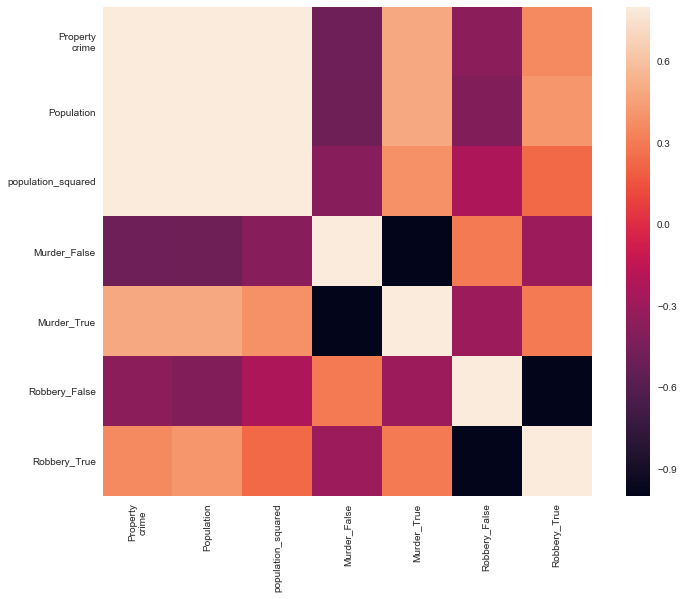

In [830]:
corrmat = prop_crime2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

* It looks like there is a lot of correlation. Population and population_squared are redundant.

In [831]:
X_cols = prop_crime2.columns.drop(['Property\ncrime' ])
X_cols

Index(['Population', 'population_squared', 'Murder_False', 'Murder_True',
       'Robbery_False', 'Robbery_True'],
      dtype='object')

In [832]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = prop_crime2['Property\ncrime'].values.reshape(-1, 1)
X = prop_crime2[X_cols]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.04410941e-02  1.69296711e-07 -9.70993753e+01  9.70993753e+01
  -4.78396247e+01  4.78396247e+01]]

Intercept: 
 [137.49499353]

R-squared:
0.7921042035982608


### Assumptions of Multivariable Linear Regression
For regression to work its magic, inputs to the model need to be consistent with four assumptions:

1. Assumption one: linear relationship = ok
* Assumption two: multivariate normality
* Assumption three: homoscedasticity
* Assumption four: low multicollinearity ~ok

### 2.Assumption two: multivariate normality
The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.

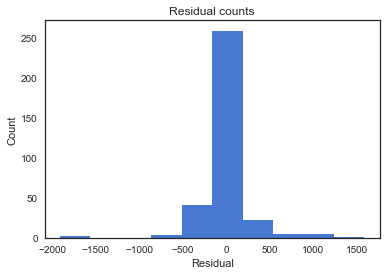

In [833]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = prop_crime2['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### 3.Assumption three: homoscedasticity
The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions.

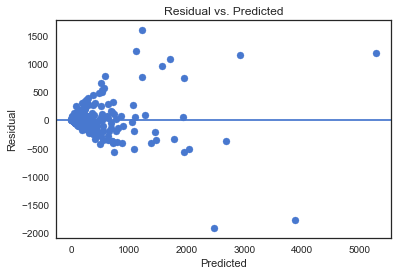

In [834]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.